In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data=pd.read_csv('Mastercard_stock_history.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...,...
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [4]:
data.dropna()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0
...,...,...,...,...,...,...,...,...
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data = data.sort_values(by='Date', ascending=True)

In [7]:
data = data.drop(['Dividends', 'Stock Splits'],axis=1)

In [8]:
data

,Date,Open,High,Low,Close,Volume
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000
...,...,...,...,...,...,...
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3872 non-null   datetime64[ns]
 1   Open    3872 non-null   float64       
 2   High    3872 non-null   float64       
 3   Low     3872 non-null   float64       
 4   Close   3872 non-null   float64       
 5   Volume  3872 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 181.6 KB


In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

In [11]:
n_steps = 60  # Adjust as needed

# Create sequences of input-output pairs
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data.iloc[i:i+n_steps, 1:].values)  # Input features (excluding 'Date' column)
        y.append(data.iloc[i+n_steps, 4])            # Target variable ('Close' price)
    return np.array(X), np.array(y)

X, y = create_sequences(data, n_steps)

# Split the dataset into training and testing sets
split_ratio = 0.8  # Adjust as needed
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [12]:
X_train.shape

(3049, 60, 5)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(n_steps, 5)),
    Dense(units=1)  # Output layer with 1 neuron for regression task
])

C:\Users\Sumanth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse')

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0102
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.8992e-05
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.1069e-05
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.1053e-05
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.0413e-05
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.9703e-05
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.1590e-05
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.8122e-05
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.8252e-05
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.8862e-05


In [17]:
from sklearn.metrics import r2_score

# Make predictions using the trained LSTM model
predictions = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
R^2 Score: 0.8917858425767553


In [41]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

24/24 [==============================] - 1s 10ms/step - loss: 0.0018
Test Loss: 0.0018292419845238328


In [42]:
# Evaluate the model on the testing data
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)


24/24 [==============================] - 0s 9ms/step - loss: 0.0018
Test MSE: 0.0018292419845238328


In [18]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(predictions[i], y_test[i])

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[0.5499138] 0.5527861738980661
[0.55171627] 0.5492623324166814
[0.55240583] 0.5511753363227111
[0.5533095] 0.533606288136032
[0.5520072] 0.5269535504354633
[0.54896307] 0.514353702756495
[0.5436627] 0.5181336531537041
[0.5389644] 0.4851975621749768
[0.53241134] 0.4797041509379418
[0.52308613] 0.5041729827043346


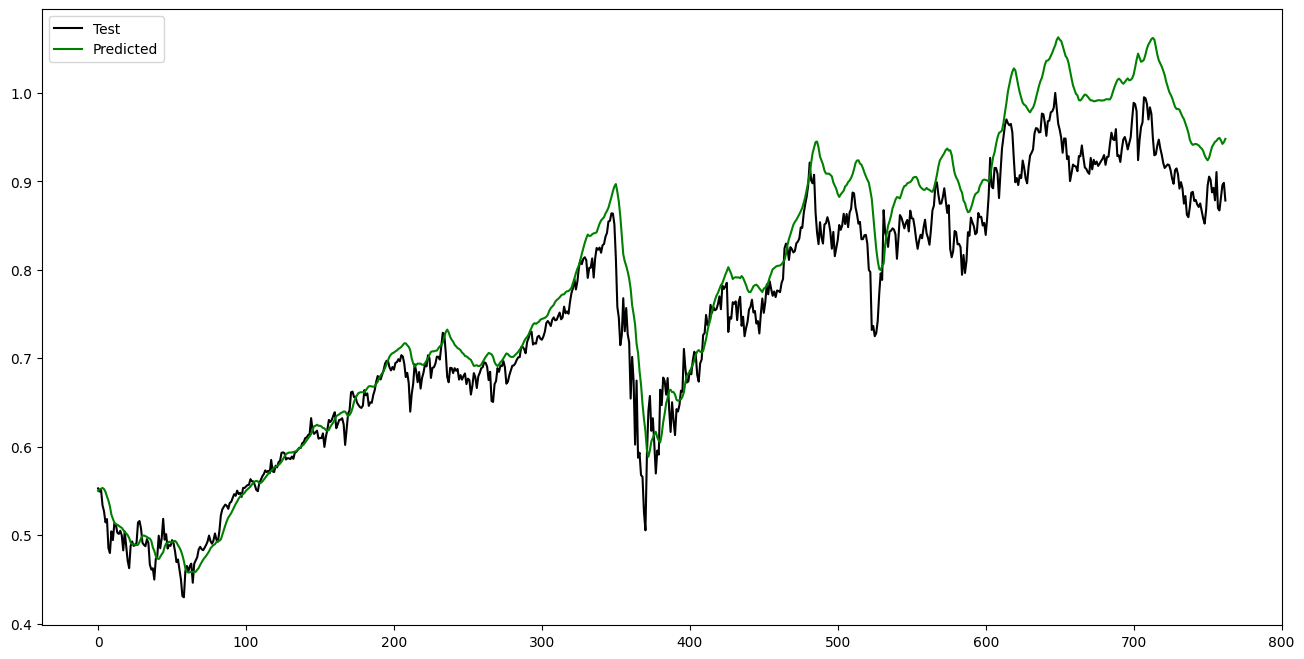

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(y_test, color='black', label='Test')
plt.plot(y_pred, color='green', label='Predicted')
plt.legend()
plt.show()
